Reference :
1. https://www.kaggle.com/code/dindaanasta/analisis-sentimen-pengguna-aplikasi-sayurbox#Split-the-review-into-data-train-and-test
2. https://www.kaggle.com/code/ruchi798/sentiment-analysis-the-simpsons
3. https://www.analyticsvidhya.com/blog/2023/03/tiktok-sentiment-analysis-with-python-analyzing-user-reviews/

Goals :
1. insight visualisasi sentimen
2. perbandingan 3 algoritma machine learning
3. testing

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to C:\Users\Muhammad Ade
[nltk_data]     Aulia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv('../data/hasil_preprocessingContentScore.csv', index_col=0)
df

,content,score
0,tiktok sangat bagus karya dapat teman banyak b...,5
1,maaf kasih 2 aplikasi nya kurang bagus padahal...,2
2,tiktok nya sangat bagus pas buka video nya non...,3
3,dengan tiktok pas buka muter muter padahal wif...,2
4,makin update malah oploadnya selalu gagal mulu...,1
...,...,...
376,hallo sangat kecewa sama tiktok saya punya aku...,1
377,aplikasi sangat penting hibur tarik waktu sedih,5
378,aplikasi sangat bagus hibur sayang hp sya kent...,5
379,banyak ilmu dapat untuk alam tiap waktu simpan...,5


In [5]:
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    # elif score == 3:
    #     return 'netral'
    else:
        return 'positif'

df['sentimen'] = df['score'].apply(label_sentiment)

In [6]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

sentimen
positif    238
negatif    143
Name: count, dtype: int64

## VISUALISASI SENTIMEN

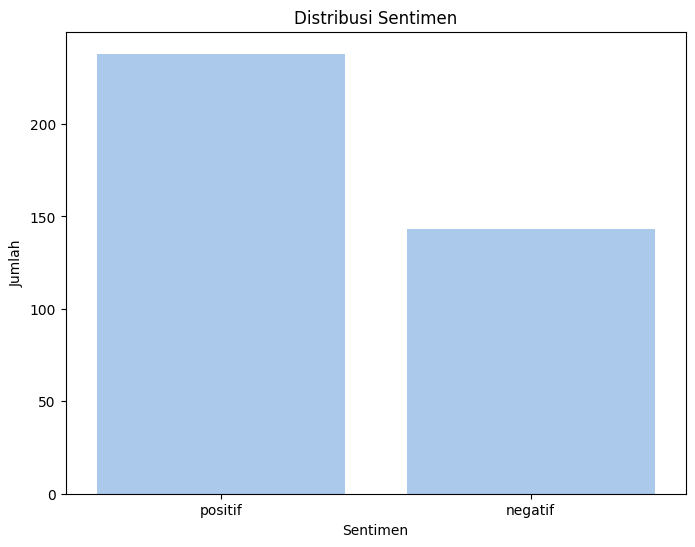

In [7]:
# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentimen', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [8]:
data_negatif = df[df['sentimen'] == 'negatif']
data_positif = df[df['sentimen'] == 'positif']

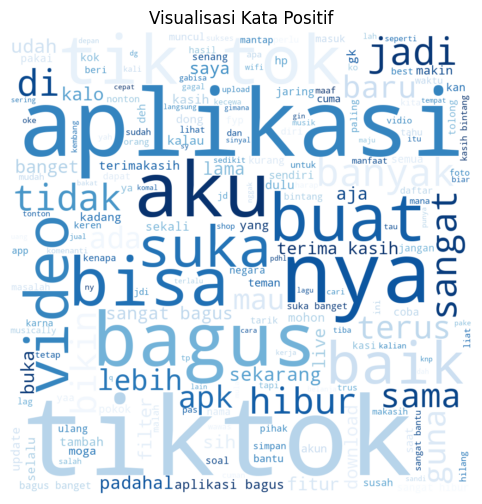

In [9]:
all_text_s1 = ' '.join(word for word in data_positif["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

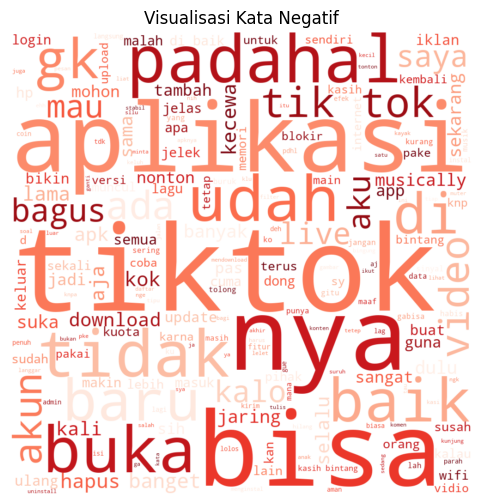

In [10]:
all_text_s0 = ' '.join(word for word in data_negatif["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

## SPLITING DATA

In [11]:
X=df.content
y=df.sentimen

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [13]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 304
Banyak data x_test  : 77
Banyak data y_train : 304
Banyak data y_test  : 77


## TRAINING DATA

In [1]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [15]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

clf1 = SVC(kernel="linear") 
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

In [16]:
model1 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [17]:
model1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [18]:
hasil1=model1.predict(x_test)

In [19]:
matrix = classification_report(y_test,hasil1)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.59      0.73      0.65        22
     positif       0.88      0.80      0.84        55

    accuracy                           0.78        77
   macro avg       0.74      0.76      0.75        77
weighted avg       0.80      0.78      0.79        77



In [20]:
model2.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [21]:
hasil2=model2.predict(x_test)

In [22]:
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.62      0.23      0.33        22
     positif       0.75      0.95      0.84        55

    accuracy                           0.74        77
   macro avg       0.69      0.59      0.59        77
weighted avg       0.72      0.74      0.69        77



In [23]:
model3.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [24]:
hasil3=model3.predict(x_test)

In [25]:
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.70      0.64      0.67        22
     positif       0.86      0.89      0.88        55

    accuracy                           0.82        77
   macro avg       0.78      0.76      0.77        77
weighted avg       0.81      0.82      0.82        77



In [26]:
hasilDecisionTreeClassifier = accuracy_score(hasil1, y_test)
precision1 = precision_score(y_test, hasil1, average='weighted')
recall1 = recall_score(y_test, hasil1, average='weighted')
f1_1 = f1_score(y_test, hasil1, average='weighted')

hasilMultinomialNB = accuracy_score(hasil2, y_test)
precision2 = precision_score(y_test, hasil2, average='weighted')
recall2 = recall_score(y_test, hasil2, average='weighted')
f1_2 = f1_score(y_test, hasil2, average='weighted')

hasilRandomForestClassifier = accuracy_score(hasil3, y_test)
precision3 = precision_score(y_test, hasil3, average='weighted')
recall3 = recall_score(y_test, hasil3, average='weighted')
f1_3 = f1_score(y_test, hasil3, average='weighted')

In [27]:
model = {'Model':['Decision Tree Classifier',
                  'Multinomial Naive Bayes',
                  'Random Forest Classifier',
                 ],
         'AccuracyScore':[hasilDecisionTreeClassifier, hasilMultinomialNB, hasilRandomForestClassifier],
         'Precision':[precision1, precision2, precision3],
         'Recall':[recall1, recall2, recall3],
         'F1-Score':[f1_1, f1_2, f1_3]
         }
model_df = pd.DataFrame(model)
model_df

,Model,AccuracyScore,Precision,Recall,F1-Score
0,Decision Tree Classifier,0.779221,0.797884,0.779221,0.785228
1,Multinomial Naive Bayes,0.740260,0.716874,0.740260,0.694316
2,Random Forest Classifier,0.818182,0.814035,0.818182,0.815476


## TESTING

In [28]:
def classify_text(input_text):
    models = [
        ('DecisionTreeClassifier', model_decisionTree),
        ('MultinomialNB', model_multinomialNaiveBayes),
        ('RandomForestClassifier', model_randomForest)
    ]

    results = {}

    for name, model in models:
        prediction = model.predict([input_text])
        results[name] = prediction[0]

    return results

In [29]:
model_decisionTree = model1.fit(x_train, y_train)
model_multinomialNaiveBayes = model2.fit(x_train, y_train)
model_randomForest = model3.fit(x_train, y_train)

In [30]:
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")

results = classify_text(input_text)

print("Input kata :", input_text)

print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

Masukkan teks yang ingin diklasifikasikan:  barang jelek


Input kata : barang jelek

Hasil Klasifikasi:
DecisionTreeClassifier: negatif
MultinomialNB: negatif
RandomForestClassifier: positif
